In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
print("Required libraries are imported")


Required libraries are imported


In [3]:
df = pd.read_csv("C:/Users/Testbook/Downloads/Dataset and relavant files - Python Project 1/fifa.csv")
df1 = pd.read_csv("C:/Users/Testbook/Downloads/Dataset and relavant files - Python Project 1/fifa_ variable_information.csv")

In [4]:
df.info("C:/Users/Testbook/Downloads/Dataset and relavant files - Python Project 1/fifa.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [5]:
df1.info("C:/Users/Testbook/Downloads/Dataset and relavant files - Python Project 1/fifa_ variable_information.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          59 non-null     object
 1   unique id for every player  59 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [7]:
shape = df.shape
print(shape)
shape = df1.shape
print(shape)

(18207, 60)
(59, 2)


In [14]:
print(df.columns)
print(df1.columns)


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')
Index(['ID', 'unique id for every player'], dtype='object')


Data Processing and Data Cleaning 

In [72]:
def parse_suffix(value):
    if isinstance(value, float):
        return value  # Return as is if it's already a float
    elif value.endswith("M"):
        return float(value[:-1]) * 1000000
    elif value.endswith("K"):
        return float(value[:-1]) * 1000
    else:
        return float(value)

# Apply the function to the DataFrame column
original_df["Wage"] = original_df["Wage"].apply(parse_suffix)
original_df["Value"] = original_df["Value"].apply(parse_suffix)
original_df["Release Clause"] = original_df["Release Clause"].apply(parse_suffix)



In [25]:
print(original_df["Release Clause"]) 


0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64


In [73]:
print(original_df.columns)


Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Year'],
      dtype='object')


In [75]:
# Reload or recreate your original DataFrame from the original data source
# For example, if your original data was loaded from a CSV file:
original_df = pd.read_csv("C:/Users/Testbook/Downloads/Dataset and relavant files - Python Project 1/fifa.csv")

# Reapply the changes to the original DataFrame
original_df["Value"] = original_df["Value"].str.replace("â‚¬", "")
original_df["Value"] = original_df["Value"].str.replace("€", "")
original_df["Release Clause"] = original_df["Release Clause"].str.replace("â‚¬", "")
original_df["Release Clause"] = original_df["Release Clause"].str.replace("€", "")
original_df["Wage"] = original_df["Wage"].str.replace("â‚¬", "")
original_df["Wage"] = original_df["Wage"].str.replace("€", "")

# Parse the dates and extract the year
original_df["Year"] = pd.to_datetime(original_df["Joined"]).dt.year

# Fill missing values with a placeholder (e.g., 0)
original_df["Year"].fillna(0, inplace=True)

# Convert the "Year" column to integer
original_df["Year"] = original_df["Year"].astype(int)

# Drop the original "Joined" column
original_df.drop(columns=["Joined"], inplace=True)

# Display the original DataFrame with the changes applied
print(original_df)


           ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https

In [54]:
print(original_df["Year"])

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Year, Length: 18207, dtype: int32


In [76]:
print(original_df.columns)
original_df.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)


Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Year'],
      dtype='object')


In [77]:
def convert_release_clause(value):
    if isinstance(value, float):
        return value  # Return as is if it's already a float
    elif value.endswith("M"):
        return float(value[:-1]) * 1000000
    elif value.endswith("K"):
        return float(value[:-1]) * 1000
    else:
        return float(value)

original_df["Release Clause"] = original_df["Release Clause"].apply(convert_release_clause)

# Display the DataFrame
print(original_df["Release Clause"])

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64


In [78]:
print(original_df.columns)


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Loaned From', 'Contract Valid Until', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Year'],
      dtype='object')


In [79]:
original_df["Contract Valid Until"] = pd.to_datetime(original_df["Contract Valid Until"], errors='coerce', format='%Y-%m-%d')
print (original_df['Contract Valid Until'])

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
18202   NaT
18203   NaT
18204   NaT
18205   NaT
18206   NaT
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]


In [80]:
original_df["Height"] = original_df["Height"].astype(str).str.replace("'", "").astype(float)
print(original_df["Height"])


0         57.0
1         62.0
2         59.0
3         64.0
4        511.0
         ...  
18202     59.0
18203     63.0
18204     58.0
18205    510.0
18206    510.0
Name: Height, Length: 18207, dtype: float64


In [81]:
original_df["Weight"] = original_df["Weight"].str.replace("lbs", "")
print(original_df["Weight"])

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18207, dtype: object


In [82]:
original_df["Weight"] = original_df["Weight"].astype(float)
print(original_df["Weight"])

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64


In [83]:
missing_values = original_df.isnull().sum()
print(missing_values)

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Loaned From                 16943
Contract Valid Until        18207
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing   

In [84]:
total_rows = len(original_df)
print(total_rows)

18207


In [85]:
percentage_Missing_values = (missing_values/total_rows)*100
print(percentage_Missing_values)

ID                            0.000000
Name                          0.000000
Age                           0.000000
Nationality                   0.000000
Overall                       0.000000
Potential                     0.000000
Club                          1.323667
Value                         0.000000
Wage                          0.000000
Preferred Foot                0.263635
International Reputation      0.263635
Weak Foot                     0.263635
Skill Moves                   0.263635
Work Rate                     0.263635
Body Type                     0.263635
Position                      0.329544
Jersey Number                 0.329544
Loaned From                  93.057615
Contract Valid Until        100.000000
Height                        0.263635
Weight                        0.263635
Crossing                      0.263635
Finishing                     0.263635
HeadingAccuracy               0.263635
ShortPassing                  0.263635
Volleys                  

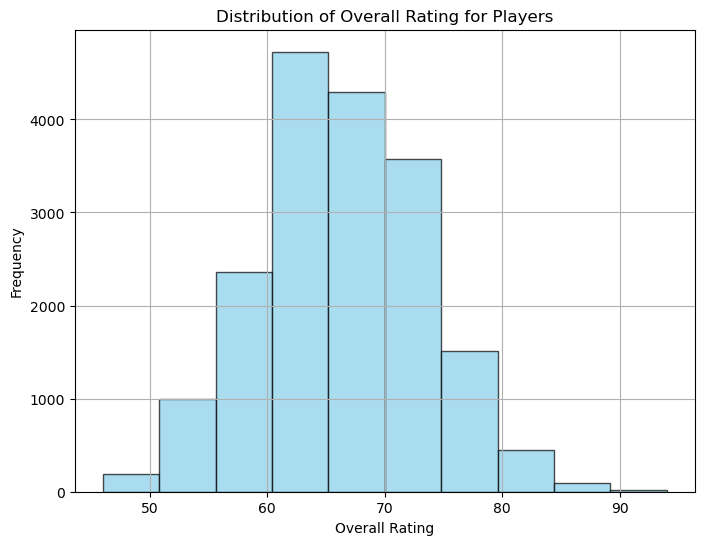

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(original_df["Overall"], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Overall Rating for Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [99]:
def convert_Value(value):
    if isinstance(value, float):
        return value  # Return as is if it's already a float
    elif value.endswith("M"):
        return float(value[:-1]) * 1000000
    elif value.endswith("K"):
        return float(value[:-1]) * 1000
    else:
        return float(value)

original_df["Value"] = original_df["Value"].apply(convert_Value)

# Display the DataFrame
print(original_df["Value"])

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64


In [87]:
def convert_Wage(value):
    if isinstance(value, float):
        return value  # Return as is if it's already a float
    elif value.endswith("M"):
        return float(value[:-1]) * 1000000
    elif value.endswith("K"):
        return float(value[:-1]) * 1000
    else:
        return float(value)

original_df["Wage"] = original_df["Wage"].apply(convert_release_clause)

# Display the DataFrame
print(original_df["Wage"])

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64


In [88]:
top_20_players = original_df.nlargest(20, 'Overall')
print(top_20_players)


        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   200389           J. Oblak   25    Slovenia       90         93   
10  188545     R. Lewandowski   29      Poland       90         90   
11  182521           T. Kroos   28     Germany       90         90   
12  182493           D. Godín   32     Uruguay       90         90   
13  168542        Da

In [89]:
print(top_20_players[['Age', 'Wage']].mean())


Age         28.3
Wage    289700.0
dtype: float64


In [90]:
max_wage_player = top_20_players.loc[top_20_players['Wage'].idxmax()]
print(max_wage_player['Name'])


L. Messi


In [91]:
df2 = original_df[['Name', 'Wage', 'Club', 'Overall']]
print(df2)


                     Name      Wage                 Club  Overall
0                L. Messi  565000.0         FC Barcelona       94
1       Cristiano Ronaldo  405000.0             Juventus       94
2               Neymar Jr  290000.0  Paris Saint-Germain       92
3                  De Gea  260000.0    Manchester United       91
4            K. De Bruyne  355000.0      Manchester City       91
...                   ...       ...                  ...      ...
18202        J. Lundstram    1000.0      Crewe Alexandra       47
18203  N. Christoffersson    1000.0       Trelleborgs FF       47
18204           B. Worman    1000.0     Cambridge United       47
18205      D. Walker-Rice    1000.0      Tranmere Rovers       47
18206           G. Nugent    1000.0      Tranmere Rovers       46

[18207 rows x 4 columns]


In [92]:
# Group by 'Club' and calculate the average 'Overall' rating for each club
average_overall_by_club = df2.groupby('Club')['Overall'].mean()

print(average_overall_by_club)


Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64


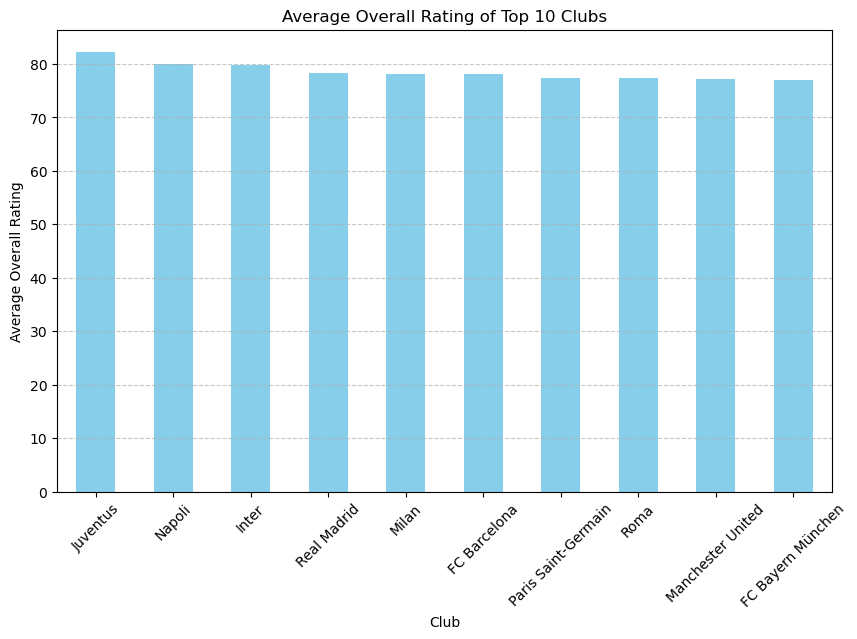

In [94]:
import matplotlib.pyplot as plt

# Sort clubs based on average overall rating and select top 10 clubs
top_10_clubs = average_overall_by_club.sort_values(ascending=False).head(10)

# Plot the average overall rating of top 10 clubs
plt.figure(figsize=(10, 6))
top_10_clubs.plot(kind='bar', color='skyblue')
plt.title('Average Overall Rating of Top 10 Clubs')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


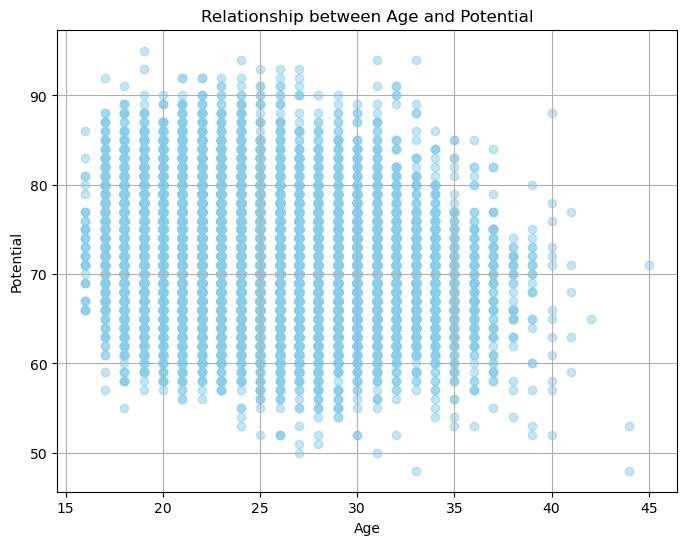

In [96]:
import matplotlib.pyplot as plt

# Plot the relationship between 'Age' and 'Potential'
plt.figure(figsize=(8, 6))
plt.scatter(original_df['Age'], original_df['Potential'], color='skyblue', alpha=0.5)
plt.title('Relationship between Age and Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.grid(True)
plt.show()


Scatter Plot of this data : We can see that the dots are concentrated around the value 25 on the x-axis, and 70 on the y-axis.
s.

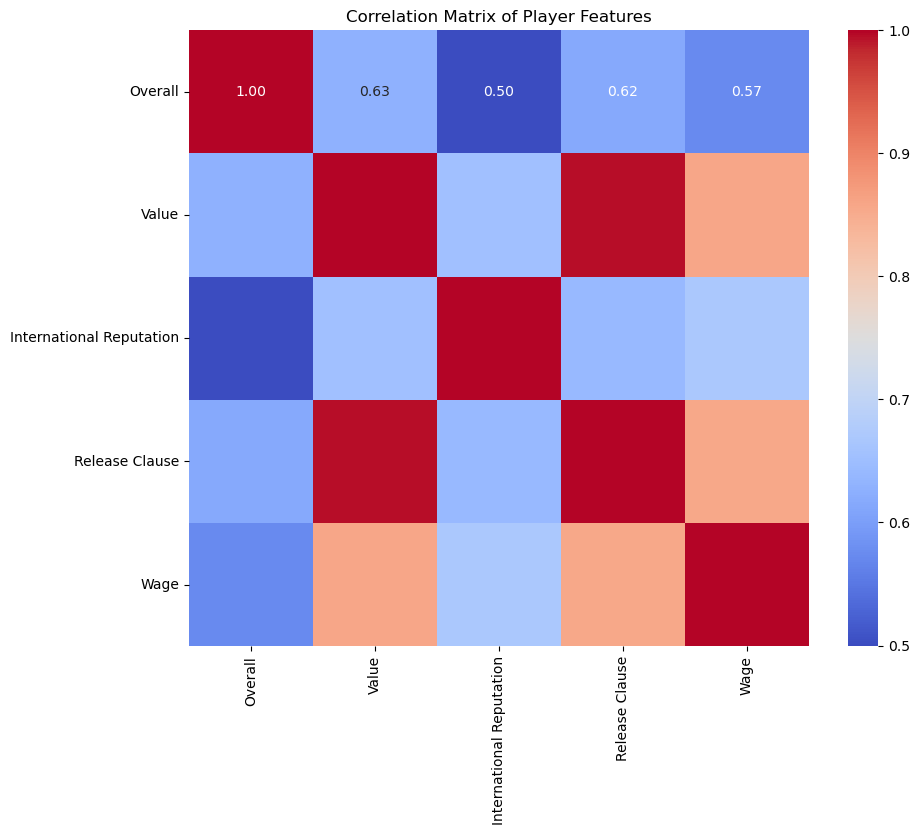

In [100]:
import seaborn as sns

# Select the relevant columns for correlation analysis
columns_for_correlation = ['Overall', 'Value', 'International Reputation', 'Release Clause', 'Wage']

# Calculate the correlation matrix
correlation_matrix = original_df[columns_for_correlation].corr()

# Plot the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Player Features')
plt.show()


'Overall' vs. 'Wage':

Correlation coefficient: 0.57
Conclusion: There is a moderate positive correlation between the overall rating of players and their wages. This suggests that players with higher overall ratings tend to receive higher wages.
'Value' vs. 'Wage':

Correlation coefficient: Not provided in the snippet
Conclusion: Since the correlation coefficient is not provided, we cannot draw a conclusion about the relationship between the market value of players and their wages based on this snippet alone. We would need the actual correlation coefficient for further analysis.
'International Reputation' vs. 'Wage':

Correlation coefficient: Not provided in the snippet
Conclusion: Similar to 'Value' vs. 'Wage', without the correlation coefficient, we cannot draw a conclusion about the relationship between the international reputation of players and their wages based on this snippet alone.
'Release Clause' vs. 'Wage':

CorrelationNot provided in the snippetfficient: 0.62
Conclusion: There is a moderate positive correlation between the release clauses in players' contracts and their wages. This suggests that players with higher release clauses tend to have higher wages.
Overall Conclusion:

Based on the provided correlation coefficients:
The overall rating of players has a moderate positive correlationon with their wages.

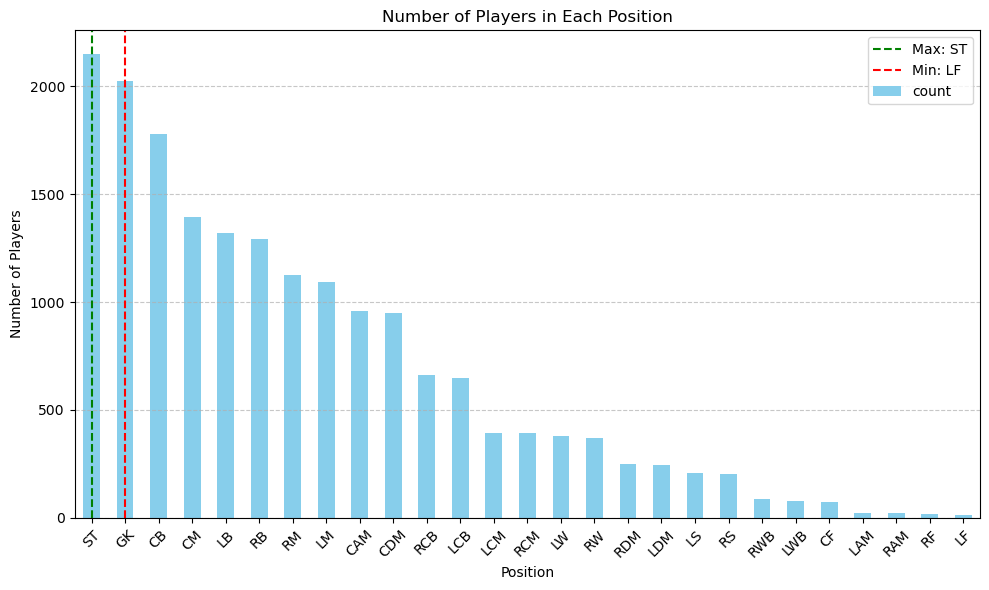

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the player data
# Let's say the position column is named 'Position'

# Count the number of players in each position
position_counts = original_df['Position'].value_counts()

# Identify the position with the maximum and minimum counts
max_position = position_counts.idxmax()
min_position = position_counts.idxmin()

# Plot the counts
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the position with the maximum count
plt.axvline(x=max_position, color='green', linestyle='--', label=f'Max: {max_position}')

# Highlight the position with the minimum count
plt.axvline(x=min_position, color='red', linestyle='--', label=f'Min: {min_position}')

plt.legend()
plt.tight_layout()
plt.show()


ST Position has Maximum Number of PLayer and LF postion has Minimum Number of Player

In [102]:
# Group by 'Position' and select the top 5 players with the highest Overall rating for each position
top_5_players_by_position = original_df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall'))

# Reset the index to remove the multi-index created by groupby
top_5_players_by_position.reset_index(drop=True, inplace=True)

print(top_5_players_by_position)


         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Marking  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...     5

Generate a data frame containing top 5 players by Overall rating for each unique position.


In [105]:
top_5_players_names = top_5_players_by_position.nlargest(5, 'Overall')['Name']
print(top_5_players_names)


105             L. Messi
130    Cristiano Ronaldo
70             Neymar Jr
25                De Gea
55             E. Hazard
Name: Name, dtype: object


How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [106]:
# Filter the DataFrame
juventus_players_high_wage = original_df[(original_df['Club'] == 'Juventus') & (original_df['Wage'] > 200000)]

# Display the information of selected players
print(juventus_players_high_wage)


        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Marking  StandingTackle  \
1   77000000.0  405000.0          Right  ...     28.0            31.0   
15  89000000.0  205000.0           Left  ...     23.0            20.0   
24  27000000.0  215000.0           Left  ...     93.0            93.0   

    SlidingTackle GKDiving GKHandling GKKicking  GKPositioning GKReflexes  \
1            23.0      7.0       11.0      15.0           14.0       11.0   
15           20.0      5.0        4.0       4.0            5.0        8.0   
24           90.0      3.0        3.0       2.0            4.0        3.0   

   Release Clause  Year  
1     127100000.0  2018  
15    153500000.0  2015  

What is the average wage one can expect to pay for the top 5 players in every position?


In [111]:
# Group by 'Position' and 'Club' and calculate the average wage for each group
average_wages_by_position_club = top_5_players_by_position.groupby(['Position', 'Club'])['Wage'].mean()

# Select the top 5 average wages
top_5_average_wages = average_wages_by_position_club.nlargest(5)

# Display the top 5 average wages
print(top_5_average_wages)


Position  Club        
RF        FC Barcelona    565000.0
RS        FC Barcelona    455000.0
RCM       Real Madrid     420000.0
ST        Juventus        405000.0
LCM       Real Madrid     355000.0
Name: Wage, dtype: float64
